In [1]:
# Here we will perform the Sample 1 study. We will first plot the Pdot-P and Edot-tau diagrams
# for our Sample 1 of pulsars with Edot > 10^35 erg/s and P>0.01 s. Additionally we will show
# Pdot-P and Edot-tau diagrams for a much larger 1000 pulsars sample with no  constraints to
# show where our Sample 1 is located inside these diagrams. Finally here we will study initial
# spin-down luminosity Edot0 typical values for different initial spin-down timescales tau0. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import numpy as np

import matplotlib.colors as colors
from scipy.stats import norm
from scipy.interpolate import interp1d

%matplotlib inline
%config InlineBackend.figure_format = 'png'
# First we charge Sample 1 from our text file from ATNF catalogue
data = np.genfromtxt('Period_Edot_cuts_nolabels.txt', dtype=np.str)
names = data.T[2].astype(str) # Array of names
P = data.T[12].astype(np.float) # Array of P in seconds
Pdot = data.T[16].astype(np.float) # Array of Pdot in seconds / seconds
Edot = data.T[22].astype(np.float) # Array of Edot in erg / s
tau = data.T[20].astype(np.float) # Array of characteristic age (tau) in years
# Wwe convert tau to kyr since Edot-tau diagram is in kyr
tau = tau*10**(-3) # NOW IN kyr
print('Sample 1 charged')

Sample 1 charged


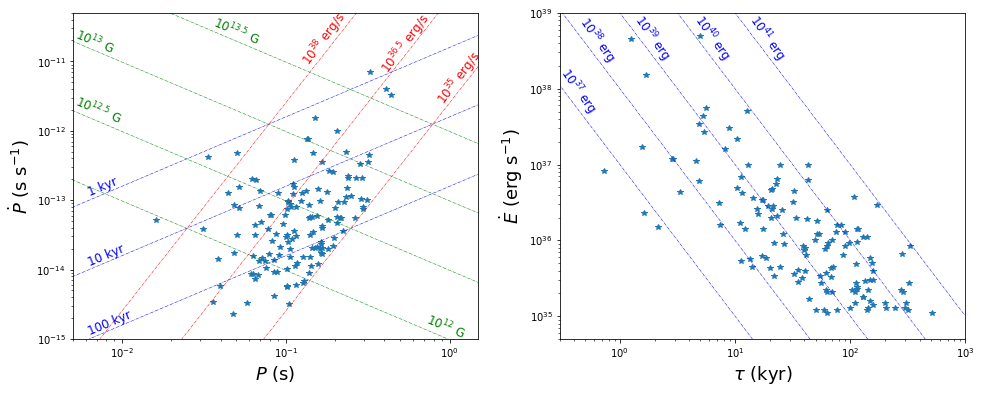

In [3]:
# Here we will plot the Pdot-P and Edot-tau diagrams for our Sample 1 with constant age, Edot
# and minimum magnetic field lines
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16,6))

# Left: Pdot P diagram 
plt.subplot(121)
plt.loglog(P, Pdot,'*')
xaxis=np.linspace(0.001,10,1000)
plt.ylabel('$\dot{P}$ (s s$^{-1}$)', fontsize = 18)
plt.xlabel('$P$ (s)', fontsize = 18)
plt.xlim(0.5*10**(-2),1.5)
plt.ylim(10**(-15),0.5*10**(-10))
#plt.legend(loc='best', fontsize=12) If want to add a legend

# Lines of constant age obtained plotting Equation 3.1 of the report
constant_age=1e3
plt.plot(xaxis, xaxis/(2*constant_age*365*24*3600),'b-.',linewidth = 0.5, label=r'1 kyr')
constant_age=1e4
plt.plot(xaxis, xaxis/(2*constant_age*365*24*3600),'b-.',linewidth = 0.5, label=r'10 kyr')
constant_age=1e5
plt.plot(xaxis, xaxis/(2*constant_age*365*24*3600),'b-.',linewidth = 0.5, label=r'100 kyr')
# Lines of minimum magnetic field strength B from Equation 3.3 of the report
constant_B=1e12
plt.plot(xaxis,constant_B**2/((3.2e19)**2 * xaxis) ,'g-.',linewidth = 0.5, label=r'$10^{12}$ G')
constant_B=np.sqrt(10)*1e12
plt.plot(xaxis,constant_B**2/((3.2e19)**2 * xaxis),'g-.',linewidth = 0.5,label=r'$10^{12.5}$ G')
constant_B=1e13
plt.plot(xaxis,constant_B**2/((3.2e19)**2 * xaxis) ,'g-.',linewidth = 0.5, label=r'$10^{13}$ G')
constant_B=np.sqrt(10)*1e13
plt.plot(xaxis,constant_B**2/((3.2e19)**2 * xaxis) ,'g-.',linewidth = 0.5, label=r'$10^{13.5}$ G')
# Lines of -Edot from Equation 3.2 of the report 
constant_E=1e35
plt.plot(xaxis,constant_E*xaxis**3/(4*np.pi**2*10**45),'r-.',linewidth = 0.5, label=r'$10^{35}$ erg/s')
constant_E=np.sqrt(10)*1e36
plt.plot(xaxis,constant_E*xaxis**3/(4*np.pi**2*10**45),'r-.',linewidth = 0.5, label=r'$10^{36.5}$ erg/s')
constant_E=1e38
plt.plot(xaxis,constant_E*xaxis**3/(4*np.pi**2*10**45),'r-.',linewidth = 0.5, label=r'$10^{38}$ erg/s')

# Labels in the image: Age in BLUE
plt.text(0.006,1.15*1e-13,'1 kyr',color='blue',rotation=22.5,fontsize=12)
plt.text(0.006,1.15*1e-14,r'10 kyr',color='blue',rotation=22.5,fontsize=12)
plt.text(0.006,1.15*1e-15,r'100 kyr',color='blue',rotation=22.5,fontsize=12)
# Labels in the image: B field in GREEN
plt.text(0.7,1*1e-15,r'$10^{12}$ G',color='green',rotation=-23,fontsize=12)
plt.text(0.005,1.25*1e-12,r'$10^{12.5}$ G',color='green',rotation=-23,fontsize=12)
plt.text(0.005,1.3*1e-11,r'$10^{13}$ G',color='green',rotation=-23,fontsize=12)
plt.text(0.035,1.7*1e-11,r'$10^{13.5}$ G',color='green',rotation=-23,fontsize=12)
# Labels in the image: -Edot in RED
plt.text(0.8,0.25*1e-11,r'$10^{35}$ erg/s',color='red',rotation=53,fontsize=12)
plt.text(0.36,0.7*1e-11,r'$10^{36.5}$ erg/s',color='red',rotation=53,fontsize=12)
plt.text(0.12,0.9*1e-11,r'$10^{38}$ erg/s',color='red',rotation=53,fontsize=12)

# Right: Edot tau diagram 
plt.subplot(122)
plt.loglog(tau, Edot,'*')
plt.ylabel(r'$\dot{E}$ (erg s$^{-1}$)', Fontsize = 18)
plt.xlabel(r'$\tau$ (kyr)', Fontsize = 18)
xaxis2=np.linspace(0.0001,1e7,10000)
plt.xlim(0.3,1e3)
plt.ylim(5*1e34,1e39)
#plt.legend(loc='best', fontsize=12) If want to add a legend

constant_Edot0=1e37
plt.plot(xaxis2,constant_Edot0*(xaxis2)**(-2) ,'b-.',linewidth = 0.5, label=r'$10^{37}$ erg')
constant_Edot0=1e38
plt.plot(xaxis2,constant_Edot0*(xaxis2)**(-2) ,'b-.',linewidth = 0.5, label=r'$10^{38}$ erg')
constant_Edot0=1e39
plt.plot(xaxis2,constant_Edot0*(xaxis2)**(-2) ,'b-.',linewidth = 0.5, label=r'$10^{39}$ erg')
constant_Edot0=1e40
plt.plot(xaxis2,constant_Edot0*(xaxis2)**(-2) ,'b-.',linewidth = 0.5, label=r'$10^{40}$ erg')
constant_Edot0=1e41
plt.plot(xaxis2,constant_Edot0*(xaxis2)**(-2) ,'b-.',linewidth = 0.5, label=r'$10^{41}$ erg')

plt.text(0.275,0.5*1e38,r'$10^{37}$ erg',color='b',rotation=-55,fontsize=12)
plt.text(0.4,2.3*1e38,r'$10^{38}$ erg',color='b',rotation=-55,fontsize=12)
plt.text(1.2,2.5*1e38,r'$10^{39}$ erg',color='b',rotation=-55,fontsize=12)
plt.text(4,2.5*1e38,r'$10^{40}$ erg',color='b',rotation=-55,fontsize=12)
plt.text(1.2*1e1,2.5*1e38,r'$10^{41}$ erg',color='b',rotation=-55,fontsize=12)

plt.savefig("diagrams_sample1.png")

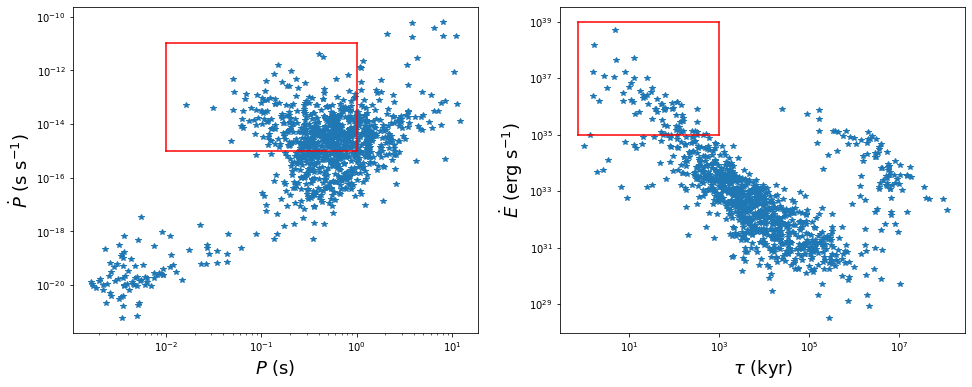

In [4]:
# LARGE DIAGRAMS STUDY
# Here we will show Pdot-P and Edot-tau diagrams for a much larger 1000 pulsars sample with no 
# constraints to show were our Sample 1 is located inside these diagrams
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import interp1d
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# Reading 1000 pulsars sample
data2 = np.genfromtxt('1000pulsars.txt', dtype=np.str)
names2 = data2.T[2].astype(str) # Array of names
P2 = data2.T[12].astype(np.float) # Array of P in seconds
Pdot2 = data2.T[14].astype(np.float) # Array of Pdot in seconds / seconds
Edot2 = data2.T[18].astype(np.float) # Array of Edot in erg / s
tau2 = data2.T[16].astype(np.float) # Array of characteristic age (tau) in years
# We convert tau to kyr since Edot-tau diagram is in kyr
tau2 = tau2*10**(-3) # NOW IN kyr

# Pdot-P and Edot-tau diagrams for 1000 pulsar sample
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16,6))
# Pdot P diagram
plt.subplot(121)
plt.loglog(P2, Pdot2,'*')
plt.ylabel('$\dot{P}$ (s s$^{-1}$)', fontsize = 18)
plt.xlabel('$P$ (s)', fontsize = 18)
# Plotting the rectangle
x1=np.linspace(1e-15,1e-11) # vertical side 
x2=np.linspace(0.01,1)  # horizontal side 
y1=np.ones(len(x1))
plt.loglog(x2,1e-15*y1,'r')
plt.loglog(0.01*y1,x1,'r')
plt.loglog(x2,1e-11*y1,'r')
plt.loglog(y1,x1,'r')

# Edot tau diagram
plt.subplot(122)
plt.loglog(tau2, Edot2,'*')
plt.ylabel(r'$\dot{E}$ (erg s$^{-1}$)', Fontsize = 18)
plt.xlabel(r'$\tau$ (kyr)', Fontsize = 18)

# Plotting the rectangle
x3=np.linspace(0.75,1000) # vertical side
x4=np.linspace(1e35,1e39) # horizontal side
plt.loglog(x3,1e35*y1,'r')
plt.loglog(0.75*y1,x4,'r')
plt.loglog(x3,1e39*y1,'r')
plt.loglog(1000*y1,x4,'r')
 
plt.savefig("diagrams_1000pulsars.png")

In [5]:
# Next we will study birth parameters such as Edot0 and tau0 studying how Edot0 evolves for 
# different values of tau0
tau = tau*10**(3) # Convert age to years for the Edot0 study

Text(0.5, 0, '$\\log{\\dot{E}_0}$')

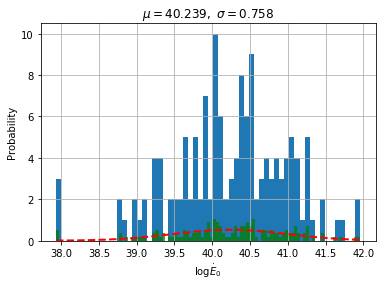

In [6]:
########################### STUDY FOR TAU0 = 10^2.5 yr #########################################
tau0 = 10**(2.5)
def fEdot(Edott,tt):
    return Edott*(1 + tt/tau0)**(2)
N=len(tau)
Edot0=np.zeros(N)
for n in range(0, len(tau)):
    Edot0[n]=fEdot(Edot[n],tau[n])

Edot0_25 = Edot0
# Histogram of Edot0
#plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.xlabel(r'$\log{\dot{E}_0}$')
plt.grid(True)
(mu, sigma) = norm.fit(np.log10(Edot0))
# Store them in a matrix 
globaldata = [mu, sigma]
# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)
totalbins = [bins]
bins1 = bins

norm.pdf
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.xlabel(r'$\log{\dot{E}_0}$')


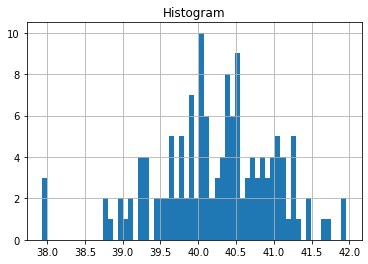

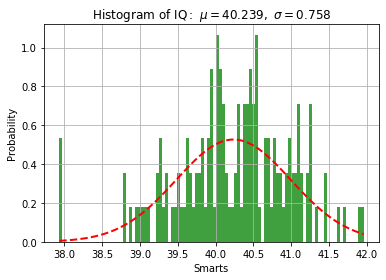

In [7]:
########################### CONTINUATION STUDY FOR TAU0 = 10^2.5 yr #########################################
# Histogram of Edot0
plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.grid(True)
plt.show()
plt.clf()

(mu, sigma) = norm.fit(np.log10(Edot0))
#print(mu, sigma)
#print(sum(np.log10(Edot0))/len(Edot0)  )

# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

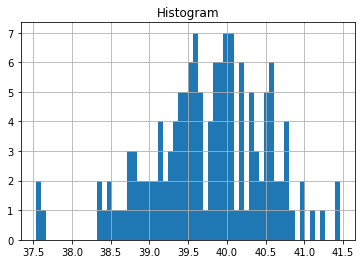

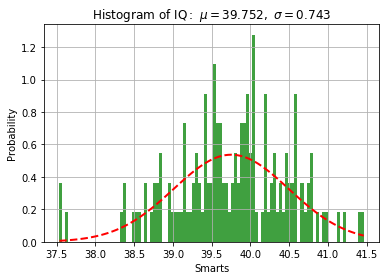

In [8]:
############################## STUDY FOR TAU0 = 10^2.75 yr #########################################


tau0 = 10**(2.75)
Edot0=np.zeros(len(tau))
for n in range(0, len(tau)):
    Edot0[n]=fEdot(Edot[n],tau[n])
Edot0_275=Edot0

# Histogram of Edot0
plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.grid(True)
plt.show()
plt.clf()
(mu, sigma) = norm.fit(np.log10(Edot0))
# Store them in a matrix 
globaldata2 = globaldata + [mu, sigma]

# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)
totalbins2 = totalbins + [bins]

bins2 = bins
# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()



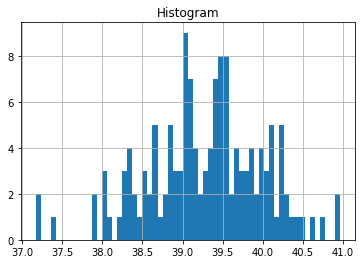

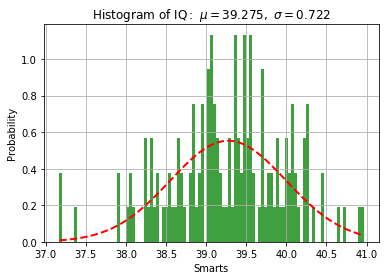

In [9]:
############################### STUDY FOR TAU0 = 10^3 yr #########################################
tau0 = 10**(3)
Edot0=np.zeros(len(tau))
for n in range(0, len(tau)):
    Edot0[n]=fEdot(Edot[n],tau[n])

Edot0_3=Edot0

# Histogram of Edot0
plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.grid(True)
plt.show()
plt.clf()

# Gaussian, changing tau0
(mu, sigma) = norm.fit(np.log10(Edot0))

# Store them in a matrix 
globaldata3 = globaldata2 + [mu, sigma]

# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)
totalbins3 = totalbins2 + [bins]

bins2 = bins
# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()


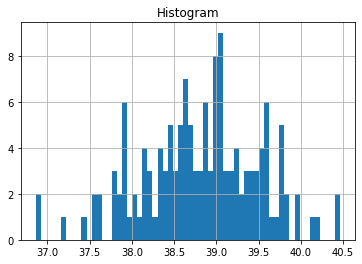

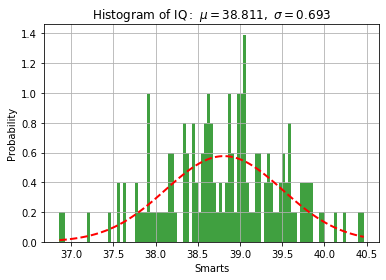

In [10]:
############################## STUDY FOR TAU0 = 10^3.25 #########################################

tau0 = 10**(3.25)
Edot0=np.zeros(len(tau))

for n in range(0, len(tau)):
    Edot0[n]=fEdot(Edot[n],tau[n])

Edot0_325=Edot0

# Histogram of Edot0
plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.grid(True)
plt.show()
plt.clf()

# Gaussian, changing tau0
(mu, sigma) = norm.fit(np.log10(Edot0))

# Store them in a matrix 
globaldata4 = globaldata3 + [mu, sigma]

# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)
totalbins4 = totalbins3 + [bins]

bins2 = bins
# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()


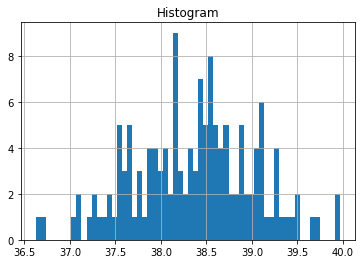

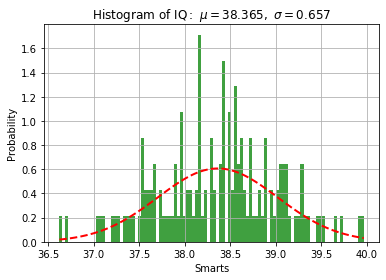

In [11]:
############################## STUDY FOR TAU0 = 10^3.5 #########################################
tau0 = 10**(3.5)
Edot0=np.zeros(len(tau))
for n in range(0, len(tau)):
    Edot0[n]=fEdot(Edot[n],tau[n])

Edot0_35=Edot0

# Histogram of Edot0
plt.title('Histogram')
plt.hist(np.log10(Edot0),bins=60)
plt.grid(True)
plt.show()
plt.clf()

# Gaussian, changing tau0
(mu, sigma) = norm.fit(np.log10(Edot0))

# Store them in a matrix 
globaldata5 = globaldata4 + [mu, sigma]

# the histogram of the data
n, bins, patches = plt.hist(np.log10(Edot0), 101, density=1, facecolor='green', alpha=0.75)
totalbins5 = totalbins4 + [bins]

bins2 = bins
# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

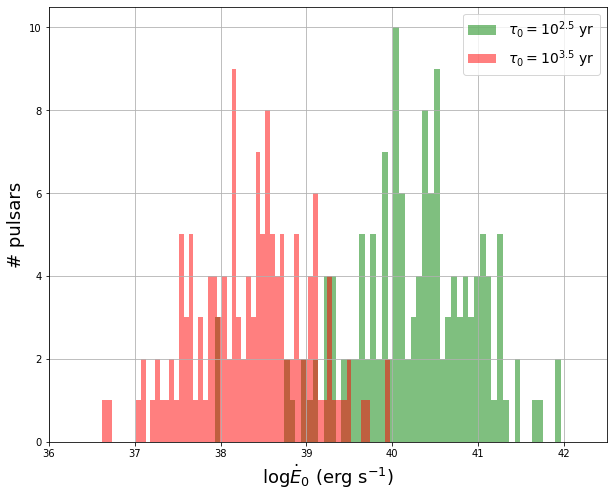

In [12]:
# Here we have plotted the results for lowest and greatest tau0 values
plt.rcParams['figure.figsize'] = (10, 8)

plt.hist(np.log10(Edot0_25),bins=60, alpha=0.5,color='g', label=r'$\tau_0 = 10^{2.5}$ yr')
plt.hist(np.log10(Edot0_35),bins=60, alpha=0.5,color='r', label=r'$\tau_0 = 10^{3.5}$ yr')
plt.ylabel('# pulsars', fontsize = 18)
plt.xlabel(r'$\log{\dot{E}_0}$ (erg s$^{-1}$)', fontsize = 18)
plt.xlim(36, 42.5)
plt.grid(True)
#plt.show()
plt.legend(loc='best', fontsize = 14)
#plt.clf()

plt.savefig("HistogramsEdot0together.png")

Tau0                    Mean                   Standard deviation
10^2.5           40.238542656504826            0.7575918567207434
10^2.75           39.75242164836291            0.7429928512384367
10^3           39.27504090399277            0.7216518529496807
10^3.25           38.81071861835416            0.692839080435025
10^3.5           38.36504345683513            0.6574827448195684
Conclusions: Since Edot0 depends inversely on tau0, for minimum values of tau0 we obtain greater values of Edot0, this 
means the curve is shifted to the right and for increasing values of tau0 the curves are gradually shifting to the left


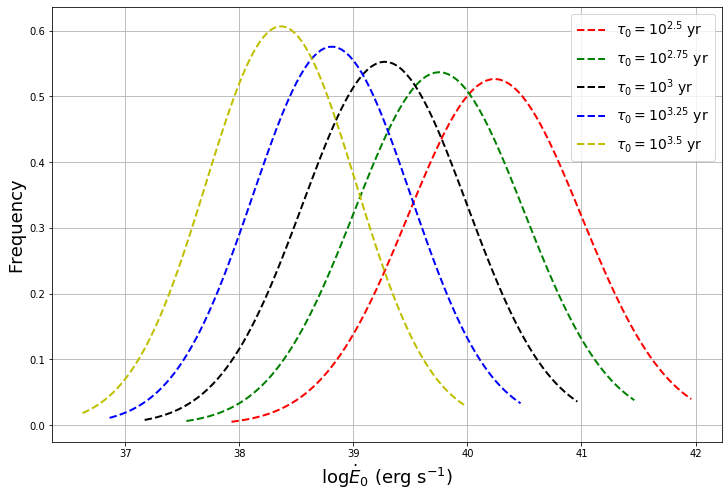

In [13]:
# Here we show results for all tau0 values studied
from IPython.display import Latex

mu1=globaldata5[0] # Average of tau0 = 10**2.5
sd1=globaldata5[1] # Standard deviation of tau0 = 10**2.5
mu2=globaldata5[2] # ...
sd2=globaldata5[3] # ...
mu3=globaldata5[4] # ...
sd3=globaldata5[5] # ...
mu4=globaldata5[6] # ...
sd4=globaldata5[7] # ...
mu5=globaldata5[8] # Media of tau0 = 10**3.5
sd5=globaldata5[9] # Standard deviation of tau0 = 10**3.5

# Store the values of the bins
bins1 = totalbins5[0] 
bins2 = totalbins5[1]
bins3 = totalbins5[2]
bins4 = totalbins5[3]
bins5 = totalbins5[4]

#print tabulate([[10**(2.5), mu1, sd1],[10**(2.75), mu2, sd2] ,[10**(3), mu3, sd3], [10**(3.25), mu4, sd4], [10**(3.5), mu4, sd4] ], headers=['Tau0', 'Mean', 'Standard deviation'])
print('Tau0','                   Mean', '                  Standard deviation')
print('10^2.5          ' , mu1,'          ', sd1)
print('10^2.75          ' , mu2,'          ', sd2)
print('10^3          ' , mu3,'          ', sd3)
print('10^3.25          ' , mu4,'          ', sd4)
print('10^3.5          ' , mu5,'          ', sd5)

values = [0, 1, 2, 3, 4]
y1, y2, y3, y4, y5=[], [], [], [], [] #=np.zeros(5)
l1, l2, l3, l4, l5=[], [], [], [], []

y1 = norm.pdf( bins1, globaldata5[0], globaldata5[1])
y2 = norm.pdf( bins2, globaldata5[2], globaldata5[3])
y3 = norm.pdf( bins3, globaldata5[4], globaldata5[5])
y4 = norm.pdf( bins4, globaldata5[6], globaldata5[7])
y5 = norm.pdf( bins5, globaldata5[8], globaldata5[9])

plt.rcParams['figure.figsize'] = (12, 8)

l1 = plt.plot(totalbins5[0], y1, 'r--', linewidth=2, label=r'$\tau_0 = 10^{2.5}$ yr')  # RED = 2.5
l2 = plt.plot(totalbins5[1], y2, 'g--', linewidth=2, label=r'$\tau_0 = 10^{2.75}$ yr')  # GREEN = 2.75
l3 = plt.plot(totalbins5[2], y3, 'k--', linewidth=2, label=r'$\tau_0 = 10^{3}$ yr')  # BLACK = 3
l4 = plt.plot(totalbins5[3], y4, 'b--', linewidth=2, label=r'$\tau_0 = 10^{3.25}$ yr')  # BLUE = 3.25
l5 = plt.plot(totalbins5[4], y5, 'y--', linewidth=2, label=r'$\tau_0 = 10^{3.5}$ yr')  # YELLOW = 3.5

#plot
plt.xlabel(r'$\log{\dot{E}_0}$ (erg s$^{-1}$)', fontsize = 18)
plt.ylabel('Frequency', fontsize=18)
#plt.title(r'Histogram of $\dot{E}_0$ for different values of $\tau_0 $')
plt.grid(True)
plt.legend(loc='best', fontsize=14)

#plt.show()
plt.savefig("gaussiansEdot.png")
r'$\alpha > \beta$'
print('Conclusions: Since Edot0 depends inversely on tau0, for minimum values of tau0 we obtain greater values of Edot0, this \n'
      'means the curve is shifted to the right and for increasing values of tau0 the curves are gradually shifting to the left' )

In [14]:
# "Table" of the results
print('10^2.5          ' , mu1,'          ', sd1)
print('10^2.75          ' , mu2,'          ', sd2)
print('10^3          ' , mu3,'          ', sd3)
print('10^3.25          ' , mu4,'          ', sd4)
print('10^3.5          ' , mu5,'          ', sd5)

10^2.5           40.238542656504826            0.7575918567207434
10^2.75           39.75242164836291            0.7429928512384367
10^3           39.27504090399277            0.7216518529496807
10^3.25           38.81071861835416            0.692839080435025
10^3.5           38.36504345683513            0.6574827448195684


In [15]:
# Absolute rate of change of the gaussians
change1=mu1-mu2
change2=mu2-mu3
change3=mu3-mu4
change4=mu4-mu5
print(change1,change2,change3,change4)

0.4861210081419145 0.4773807443701443 0.4643222856386089 0.4456751615190271


In [16]:
# Relative rate of change of the gaussians
relchange1=(mu1-mu2)/mu1*100
relchange2=(mu2-mu3)/mu2*100
relchange3=(mu3-mu4)/mu3*100
relchange4=(mu4-mu5)/mu4*100
print(relchange1,relchange2,relchange3,relchange4)

1.2080979480088845 1.2008846872094996 1.182232468639912 1.1483300938114058
